In [42]:
%matplotlib inline
import numpy as np
from scipy import interpolate
from scipy.integrate import odeint
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
from astropy.table import Table
from astropy.io import ascii
from __future__ import print_function, division
from IPython.html import widgets
from IPython.display import display

sns.set_style("white")
#sns.set_style("whitegrid")
"""
rc('axes',fc='w',ec='k',lw=0.5,grid=True)
rc('lines',lw=1)
rc('grid',c='k',lw='0.1',alpha=0.5)
rc('legend',handletextpad=0.2,markerscale=1.4)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 12}
rc('font', **font)
rc('text', usetex=True)
"""

"\nrc('axes',fc='w',ec='k',lw=0.5,grid=True)\nrc('lines',lw=1)\nrc('grid',c='k',lw='0.1',alpha=0.5)\nrc('legend',handletextpad=0.2,markerscale=1.4)\nfont = {'family' : 'normal',\n        'weight' : 'bold',\n        'size'   : 12}\nrc('font', **font)\nrc('text', usetex=True)\n"

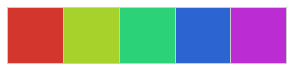

In [2]:
#COLORSCOLORSCOLORS
c, g, m, greyscale = (() for i in range(4))
c = sns.hls_palette(5, l=.5, s=.65)
greyscale = sns.cubehelix_palette(5, start=1.5, rot=-2.75, light=0.75, dark=0.6, hue=0.3, reverse=True)
greys = sns.cubehelix_palette(start=0.5, rot=-2.75, light=1.0, dark=0.3, as_cmap=True)
#COLORSCOLROSCOSOLR
sns.palplot(c)
#for i in dt:
#    print(ascii.read(dt[dt.index(i)])['name'][0])

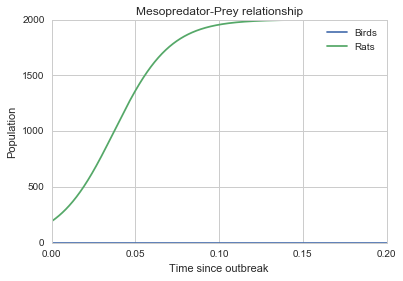

In [20]:
def solve(B0,R0):
    # define the system dy/dt = f(y, t)
    def f(y, t):
        B = y[0]
        R = y[1]
        # the model equations 
        f1 = rb*B*(1-(B/Kb)) - nb*R*(B/(S+B)) # dB/dt
        f2 = rr*R*(1-(ns*nb*R)/(nb*S+ns*B))   # dR/dt
        return [f1, f2]
    # initial conditions
    y0 = [B0, R0]
    t  = np.linspace(0, 0.2, 1000)       # time
    # solve the DEs
    soln = odeint(f, y0, t)
    B = soln[:, 0]
    R = soln[:, 1]

    # plot results
    plt.figure()
    plt.plot(t, B, label='Birds')
    plt.plot(t, R, label='Rats')
    plt.xlabel('Time since outbreak')
    plt.ylabel('Population')
    plt.title('Mesopredator-Prey relationship')
    plt.legend(loc=0)
    
    
# CONSTANTS  
    # birds
rb = 200  # birth rate
nb = 9000   # predation rate
Kb = 100000   # carrying capacity
    # rats
rr = 60   # birth rate
    # non-avian food
S = 100000.    # total (constant and abundant)
ns = 50   # predation rate

# solve the system dy/dt = f(y, t) -> F = y(t)
# initial conditions
B0 = 5000.        # initial bird population
R0 = 5000.        # initial rat population

#solve(f,B0,R0,t)
a_slider = widgets.IntSliderWidget(min=0, max=500, step=1, value=0)
b_slider = widgets.FloatSliderWidget(min=0, max=500, step=1, value=0)
w = widgets.interactive( solve, B0=a_slider, R0=b_slider)
display(w)

In [53]:
def phase_plane(ax,ay,bx,by):
    fig, axis = plt.subplots(figsize=(5,5), dpi=600)
    # define the model equations 
    def f1(B,R):
        return rb*B*(1-(B/Kb)) - nb*R*(B/(S+B)) # dB/dt
    def f2(B,R):
        return rr*R*(1-(ns*nb*R)/(nb*S+ns*B))   # dR/dt
    
    #  Define two different 2D grids
    #  X1,Y1 represent the initial condition for the 
    #  trajectories. We also use them to plot the vector field
    Nx1=20
    Ny1=20
    xx1= np.linspace(ax,bx,Nx1)
    yy1= np.linspace(ay,by,Ny1)
    X1,Y1 = np.meshgrid(xx1,yy1)

    #  X,Y for computing nullclines and the trajectories
    Nx=200
    Ny=200
    xx= np.linspace(ax,bx,Nx)
    yy= np.linspace(ay,by,Ny)
    X,Y = np.meshgrid(xx,yy)
    
    # Nullclines
    levels = [0]
    c1 = axis.contour( X,Y,f1(X,Y), levels, antialiased=True, colors='black', lw=0.5) # dx/dt=0
    c2 = axis.contour( X,Y,f2(X,Y), levels, antialiased=True, colors='blue', lw=0.5) # dy/dt=0

    # Trajectories
    #p  = haltonset(2,'Skip',1e3,'Leap',1e2);
    #p  = scramble(p,'RR2');
    #X0 = net(p,200);
    #X0(:,1)= ax + (bx-ax)*X0(:,1);
    #X0(:,2)= ay + (by-ay)*X0(:,2);
    #streamline(X,Y,f1(X,Y),f2(X,Y),X0(:,1),X0(:,2),[5e-3,1e4])
    axis.streamplot(X1, Y1, f1(X1,Y1), f2(X1,Y1), linewidth=0.5, cmap=plt.cm.autumn)
    
    # Velocity field
    plt.quiver(X1,Y1, f1(X1,Y1),f2(X1,Y1), color='r')
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    

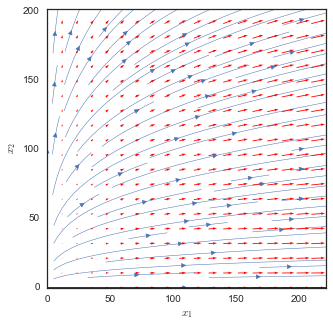

In [54]:
# CONSTANTS  
    # birds
rb = 200  # birth rate
nb = 900   # predation rate
Kb = 100000   # carrying capacity
    # rats
rr = 60   # birth rate
    # non-avian food
S = 100000.    # total (constant and abundant)
ns = 50   # predation rate



#phase_plane(f1,f2, 0,0,500,500)

bx_slider = widgets.IntSliderWidget(min=0, max=500, step=1, value=0)
by_slider = widgets.IntSliderWidget(min=0, max=500, step=1, value=0)
phase = widgets.interactive( phase_plane, ax=0,ay=0, bx=bx_slider, by=by_slider)
display(phase)

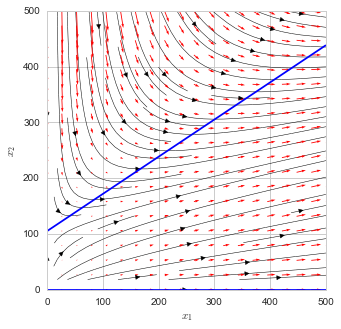

In [41]:
def ratbird(rb=200,nb=900,rr=60,ns=50):
    fig, axis = plt.subplots(figsize=(5,5), dpi=600)
    # CONSTANTS  
    # birds
    Kb = 100000   # carrying capacity
    # non-avian food
    S = 100000.    # total (constant and abundant)
    # Initial population values
    ax=0 # birds
    ay=0 # rats
    bx=500 # birds
    by=500 # rats

    # define the model equations 
    def f1(B,R):
        return rb*B*(1-(B/Kb)) - nb*R*(B/(S+B)) # dB/dt
    def f2(B,R):
        return rr*R*(1-(ns*nb*R)/(nb*S+ns*B))   # dR/dt
    
    #  Define two different 2D grids
    #  X1,Y1 represent the initial condition for the 
    #  trajectories. We also use them to plot the vector field
    Nx1=20
    Ny1=20
    xx1= np.linspace(ax,bx,Nx1)
    yy1= np.linspace(ay,by,Ny1)
    X1,Y1 = np.meshgrid(xx1,yy1)

    #  X,Y for computing nullclines and the trajectories
    Nx=200
    Ny=200
    xx= np.linspace(ax,bx,Nx)
    yy= np.linspace(ay,by,Ny)
    X,Y = np.meshgrid(xx,yy)
    
    # Nullclines
    levels = [0]
    c1 = axis.contour( X,Y,f1(X,Y), levels, antialiased=True, colors='black', lw=0.5) # dx/dt=0
    c2 = axis.contour( X,Y,f2(X,Y), levels, antialiased=True, colors='blue', lw=0.5) # dy/dt=0

    # Trajectories
    axis.streamplot(X1, Y1, f1(X1,Y1),f2(X1,Y1), color='k', linewidth=0.5, cmap=plt.cm.autumn)
    
    # Velocity field
    plt.quiver(X1,Y1, f1(X1,Y1),f2(X1,Y1), color='r')
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    


rb_slider = widgets.FloatSliderWidget(min=0, max=500, step=0.1, value=110)
nb_slider = widgets.FloatSliderWidget(min=0, max=500, step=0.1, value=1.5)
rr_slider = widgets.FloatSliderWidget(min=0, max=1000, step=0.1, value=85)
ns_slider = widgets.FloatSliderWidget(min=500, max=10000, step=0.1, value=950)
phase2D = widgets.interactive( ratbird, rb=rb_slider, nb=nb_slider, rr=rr_slider, ns=ns_slider)
display(phase2D)

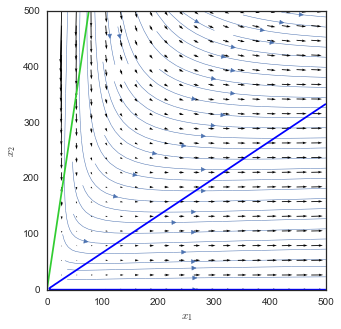

In [72]:
def catbird(rb=200,mub=900,rc=60):
    fig, axis = plt.subplots(figsize=(5,5), dpi=600)
    # CONSTANTS  
    # birds
    Kb = 100000   # carrying capacity
    # non-avian food
    S = 100000.    # total (constant and abundant)
    # Initial population values
    ax=0 # birds
    ay=0 # cats
    bx=500 # birds
    by=500 # cats

    # define the model equations 
    def f1(B,C):
        return rb*B*(1-(B/Kb)) - mub*C # dB/dt
    def f2(B,C):
        return rc*C*(1-(mub*C)/(B))   # dC/dt
    
    #  Define two different 2D grids
    #  X1,Y1 represent the initial condition for the 
    #  trajectories. We also use them to plot the vector field
    Nx1=20
    Ny1=20
    xx1= np.linspace(ax,bx,Nx1)
    yy1= np.linspace(ay,by,Ny1)
    X1,Y1 = np.meshgrid(xx1,yy1)

    #  X,Y for computing nullclines and the trajectories
    Nx=200
    Ny=200
    xx= np.linspace(ax,bx,Nx)
    yy= np.linspace(ay,by,Ny)
    X,Y = np.meshgrid(xx,yy)
    
    # Nullclines
    levels = [0]
    c1 = axis.contour( X,Y,f1(X,Y), levels, antialiased=True, colors='limegreen', lw=0.5) # dx/dt=0
    c2 = axis.contour( X,Y,f2(X,Y), levels, antialiased=True, colors='blue', lw=0.5) # dy/dt=0

    # Trajectories
    axis.streamplot(X1, Y1, f1(X1,Y1),f2(X1,Y1), linewidth=0.5, cmap=plt.cm.autumn)
    
    # Velocity field
    plt.quiver(X1,Y1, f1(X1,Y1),f2(X1,Y1),  f1(X1,Y1), cmap=plt.cm.summer)
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    


rb_slider = widgets.FloatSliderWidget(min=0, max=500, step=0.1, value=10)
mub_slider = widgets.FloatSliderWidget(min=0, max=50, step=0.1, value=1.5)
rc_slider = widgets.FloatSliderWidget(min=0, max=50, step=0.1, value=1.5)
phase2D = widgets.interactive( catbird, rb=rb_slider, mub=mub_slider, rc=rc_slider)
display(phase2D)

ValueError: too many values to unpack

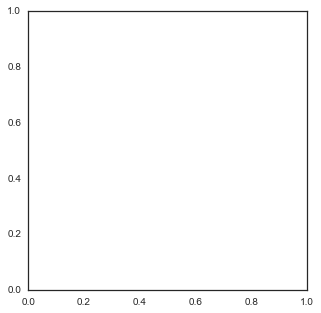

In [76]:
def mesoboom(nus,rb,nub,mub,rr,mur,rc):
    fig, axis = plt.subplots(figsize=(5,5), dpi=600)
    # CONSTANTS  
    # birds
    Kb = 100000   # carrying capacity
    # non-avian food
    S = 100000.    # total (constant and abundant)
    # Initial population values
    ax=0 # birds
    ay=0 # rats
    az=0 # cats
    bx=500 # birds
    by=500 # rats
    bz=500 # cats

    # define the model equations 
    def f1(B,R,C):
        return rb*B*(1-(B/Kb)) - nub*R*B/(S+B) - mub*C*B/(B+R) # dB/dt
    def f2(B,R,C):
        return rr*R*(1-nub*nus*R/(nub*S+nus*B)) - mur*C*R/(B+R) # dR/dt
    def f3(B,R,C):
        return rc*C*(1-(mub*mur*C)/(mur*B+mub*R))   # dC/dt
    
    #  Define two different 3D grids
    #  X1,Y1,Z1 represent the initial condition for the 
    #  trajectories. We also use them to plot the vector field
    Nx1=10
    Ny1=10
    Nz1=10
    xx1= np.linspace(ax,bx,Nx1)
    yy1= np.linspace(ay,by,Ny1)
    zz1= np.linspace(az,bz,Nz1)
    X1,Y1,Z1 = np.meshgrid(xx1,yy1,zz1)

    #  X,Y,Z for computing nullclines and the trajectories
    Nx=100
    Ny=100
    Nz=100
    xx= np.linspace(ax,bx,Nx)
    yy= np.linspace(ay,by,Ny)
    zz= np.linspace(az,bz,Nz)
    X,Y,Z = np.meshgrid(xx,yy,zz)
    
    # Nullclines
    #levels = [0]
    #c1 = axis.contour( X,Y,f1(X,Y), levels, antialiased=True, colors='limegreen', lw=0.5) # dx/dt=0
    #c2 = axis.contour( X,Y,f2(X,Y), levels, antialiased=True, colors='blue', lw=0.5) # dy/dt=0

    # Trajectories
    #axis.streamplot(X1, Y1, f1(X1,Y1),f2(X1,Y1), linewidth=0.5, cmap=plt.cm.autumn)
    
    # Velocity field
    plt.quiver(X1,Y1,Z1, f1(X1,Y1,Z1),f2(X1,Y1,Z1),f3,(X1,Y1,Z1), f1(X1,Y1,Z1), cmap=plt.cm.summer)
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    plt.zlabel(r'$x_3$')
    

nus_slider = widgets.FloatSliderWidget(min=0, max=50, step=0.1, value=1.5)
rb_slider = widgets.FloatSliderWidget(min=0, max=500, step=0.1, value=10)
nub_slider = widgets.FloatSliderWidget(min=0, max=50, step=0.1, value=1.5)
mub_slider = widgets.FloatSliderWidget(min=0, max=50, step=0.1, value=1.5)
rr_slider = widgets.FloatSliderWidget(min=0, max=500, step=0.1, value=10)
mur_slider = widgets.FloatSliderWidget(min=0, max=50, step=0.1, value=1.5)
rc_slider = widgets.FloatSliderWidget(min=0, max=50, step=0.1, value=1.5)
phase3D = widgets.interactive( mesoboom, nus=nus_slider, rb=rb_slider, nub=nub_slider, mub=mub_slider, \
                              rr=rr_slider, mur=mur_slider, rc=rc_slider)
display(phase3D)